# Домашняя работа 9. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [90]:
import pandas as pd
wine = pd.read_csv('winequality-red.csv.gz', sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: xlabel='quality', ylabel='count'>

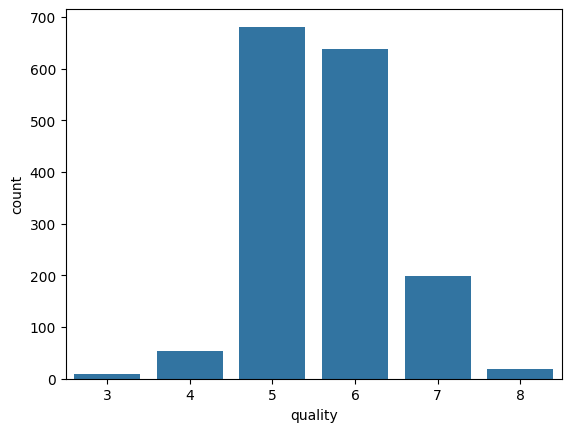

In [91]:
import seaborn as sns
sns.countplot(wine, x=wine["quality"])

In [92]:
#Оценки на вино похожи на нормальное распределение

In [93]:
y = wine['quality']
x = wine.drop(columns = 'quality')

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов.

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [94]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
print(f'mean cross val score(KNeighborsClassifier): {np.mean(cross_val_score(clf, x, y, cv= KFold(n_splits= 5,random_state=42,shuffle=True), scoring="accuracy"))}')


mean cross val score(KNeighborsClassifier): 0.5122198275862069


In [95]:
from sklearn.preprocessing import StandardScaler
clf = KNeighborsClassifier(n_neighbors=10)
print(f'mean cross val score(KNeighborsClassifier + standartScaler): {np.mean(cross_val_score(clf, StandardScaler().fit_transform(x), y, cv= KFold(n_splits= 5,random_state=42,shuffle=True), scoring="accuracy"))}')


mean cross val score(KNeighborsClassifier + standartScaler): 0.5797531347962382


In [96]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(random_state=42)
print(f'mean cross val score(RidgeClassifier): {np.mean(cross_val_score(clf, x, y, cv = KFold(n_splits = 5,random_state=42,shuffle=True), scoring="accuracy"))}')


mean cross val score(RidgeClassifier): 0.5835384012539185


In [97]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
print(f'mean cross val score(DecisionTreeClassifier): {np.mean(cross_val_score(clf, x, y, cv= KFold(n_splits = 5,random_state=42,shuffle=True), scoring="accuracy"))}')


mean cross val score(DecisionTreeClassifier): 0.6178957680250783


In [98]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators = 100)
print(f'mean cross val score(BaggingClassifier): {np.mean(cross_val_score(clf, x, y, cv= KFold(n_splits = 5,random_state=42,shuffle=True), scoring="accuracy"))}')


mean cross val score(BaggingClassifier): 0.6910834639498432


In [99]:
clf = BaggingClassifier(n_estimators = 100, max_features = 0.5)
print(f'mean cross val score(BaggingClassifier + max_features = 0.5): {np.mean(cross_val_score(clf, x, y, cv= KFold(n_splits = 5,random_state = 42,shuffle=True), scoring="accuracy"))}')


mean cross val score(BaggingClassifier + max_features = 0.5): 0.691692789968652


In [100]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(n_estimators=100)
print(f'mean cross val score(RandomForestClassifier): {np.mean(cross_val_score(clf, x, y, cv= KFold(n_splits= 5,random_state=42,shuffle=True), scoring="accuracy"))}')


mean cross val score(RandomForestClassifier): 0.7010913009404389


### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

1. метрические методы чувствительны к масштабу признаков, исходные признаки имеют разные единцы измерения и масштаб
2. признаки выбираются чтобы уменьшить энтропию и масштаб признаков не влияет на результат
3. так как бэггинг эффективен на малых выборках, на половине признаков меньше корреляция между одиночными моделями
4. KNeighborsClassifier без масштабирования, так как, на результат могут влиять признаки с малым весом

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

In [101]:
from sklearn.datasets import load_digits
x, y = load_digits(return_X_y=True)

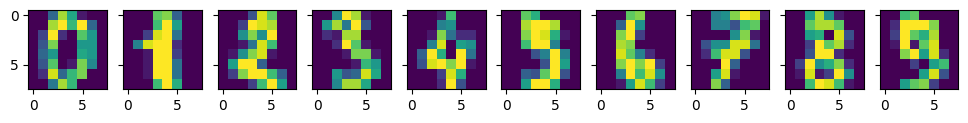

In [102]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 10, sharey=True, figsize=(12,7))
for i in range(10):
  axes[i].imshow(x[i,:].reshape([8,8]))

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [103]:
clf = DecisionTreeClassifier()
print(f'mean cross val score(DecisionTreeClassifier): {np.mean(cross_val_score(clf, x, y, cv = 10, scoring="accuracy"))}')


mean cross val score(DecisionTreeClassifier): 0.8252389819987584


In [104]:
clf = BaggingClassifier(n_estimators = 100)
print(f'mean cross val score(BaggingClassifier): {np.mean(cross_val_score(clf, x, y, cv = 10, scoring="accuracy"))}')


mean cross val score(BaggingClassifier): 0.9248355058969583


In [105]:
clf = BaggingClassifier(n_estimators = 100, max_features=int(np.sqrt(x.shape[1])))
print(f'mean cross val score(BaggingClassifier): {np.mean(cross_val_score(clf, x, y, cv = 10, scoring="accuracy"))}')


mean cross val score(BaggingClassifier): 0.9276660459342022


In [106]:
clf = BaggingClassifier(estimator = DecisionTreeClassifier(max_features=int(np.sqrt(x.shape[1]))), n_estimators = 100)
print(f'mean cross val score(BaggingClassifier): {np.mean(cross_val_score(clf, x, y, cv = 10, scoring="accuracy"))}')

mean cross val score(BaggingClassifier): 0.9454593420235877


In [107]:
clf = RandomForestClassifier(n_estimators = 100)
print(f'mean cross val score(BaggingClassifier): {np.mean(cross_val_score(clf, x, y, cv = 10, scoring="accuracy"))}')

mean cross val score(BaggingClassifier): 0.9504655493482309


### 2.3 В чём разница? (3 балла)

Ответье на вопрос:

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

ограничение количества признаков в разбиении дерева позволяет сохранить минимальную коррелированность полученных в результате построения деревьев решений, что улучшает результат бэггинга

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

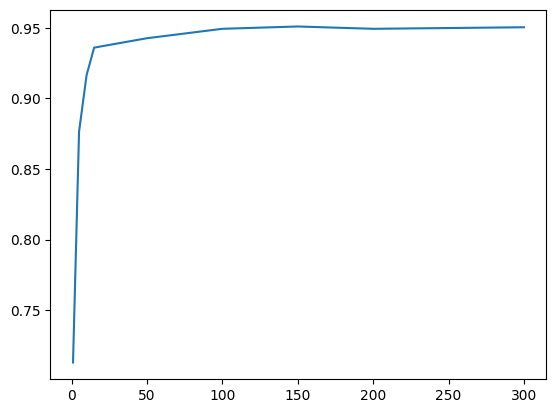

In [108]:
trees = [1,5,10,15,50,100,150,200,300]
results = []
maxR = 0
maxRT = 0
for tree in trees:
    clf = RandomForestClassifier(n_estimators=tree)
    score = np.mean(cross_val_score(clf, x, y, cv = 10, scoring="accuracy"))
    results.append(score)
    if score>maxR:
          maxR = score
          maxRT = tree
plt.plot(trees, results)

In [109]:
print(f"number of tree where the best mean cross val score: {maxRT}")

number of tree where the best mean cross val score: 150


### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

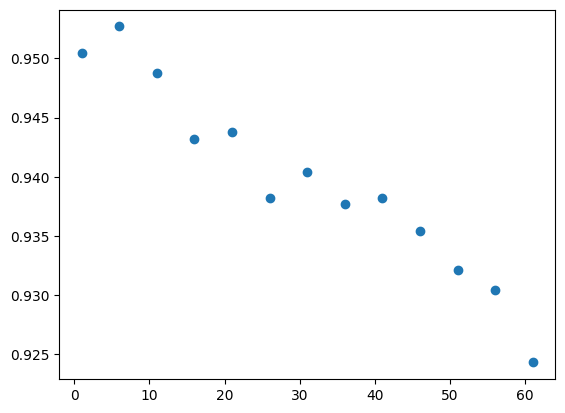

In [110]:
features = [i for i in range(1,64,5)]
results = []
maxR = 0
maxRF = 0
for f in features:
    clf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=f)
    score = np.mean(cross_val_score(clf, x, y, cv = 10, scoring="accuracy"))
    results.append(score)
    if score > maxR:
      maxRF = f
      maxR = score
plt.scatter(features, results)

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

Ответ:
1. скорость вычислений с увеличением числа деревьев будет падать, при этом качество может не улучшиться
2. чем больше признаков, тем меньше разнообразия между деревьями, что влияет на качество модели
3. уменьше признаков может помочь избежать переобучения. При увеличении числа признаков, деревья становятся более однообразными
4. чем меньше глубина тем быстрее строится лес, при увеличении глубины возрастает точность модели

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)